In [1]:
#Imports

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error  #(MSE)

#Supress the warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
#Importing the Dataset
advertising = pd.read_csv("advertising.csv")

In [4]:
#Observe the data set: X1 = TV , X2 = Radio , X3 = Newspaper , Y = Sales (Target Variable)
advertising

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


In [5]:
advertising.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [6]:
advertising.describe()   # only works on the numerical features

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


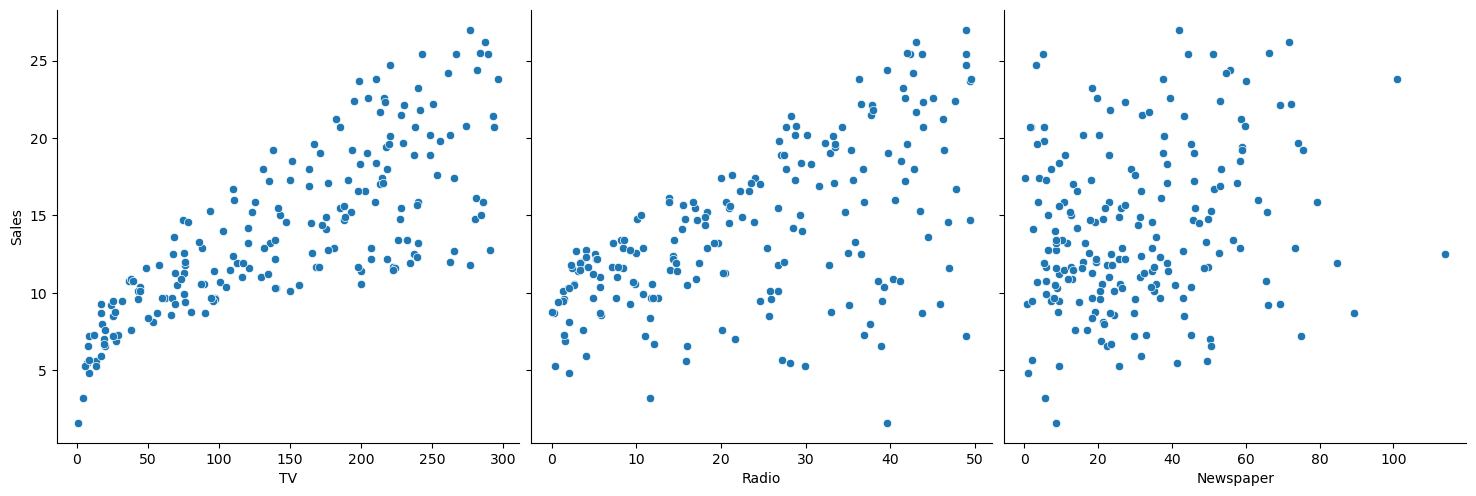

In [7]:
#Visualisation

sns.pairplot(advertising, x_vars = ['TV', 'Radio', 'Newspaper'], y_vars = 'Sales', size = 5, kind = 'scatter')

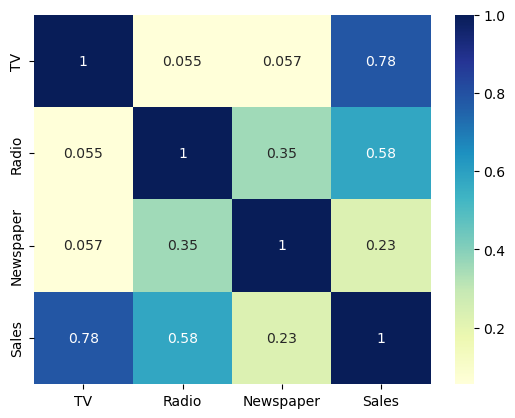

In [8]:
#Analyzing correlation with help of heatmap

sns.heatmap(advertising.corr(), cmap = "YlGnBu", annot = True)
plt.show()

In [9]:
# Analyzing multcollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
X_new = advertising[['TV','Newspaper','Radio']]

In [10]:
X_new

,TV,Newspaper,Radio
0,230.1,69.2,37.8
1,44.5,45.1,39.3
2,17.2,69.3,45.9
3,151.5,58.5,41.3
4,180.8,58.4,10.8
...,...,...,...
195,38.2,13.8,3.7
196,94.2,8.1,4.9
197,177.0,6.4,9.3
198,283.6,66.2,42.0


In [11]:
vif_data = pd.DataFrame()
vif_data["feature"] = X_new.columns
vif_data

,feature
0,TV
1,Newspaper
2,Radio


In [13]:
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X_new, i)
                          for i in range(3)]
  
print(vif_data)

     feature       VIF
0         TV  2.486772
1  Newspaper  3.055245
2      Radio  3.285462


In [14]:
vif_data['Multicolinear']=['yes' if vif_data['VIF'][i]>5 else 'no' for i in range(3)]

In [17]:
vif_data

,feature,VIF,Multicolinear
0,TV,2.486772,no
1,Newspaper,3.055245,no
2,Radio,3.285462,no


In [15]:
## defining the independent and dependent variables in the dataset.
#Presently working only with one independent variable 'TV'

#When the model is based on one independent variable it results in Simple Linear regression Model

X = advertising['TV']
y = advertising['Sales']

In [16]:
#Splitting the data into Train and Test (with split ratio = 70-30)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    train_size = 0.7,
                                                    test_size = 0.3,
                                                    random_state = 5)

In [17]:
X_train

170     50.0
182     56.2
59     210.7
185    205.0
12      23.8
       ...  
73     129.4
144     96.2
118    125.7
189     18.7
99     135.2
Name: TV, Length: 140, dtype: float64

In [18]:
type(X_train)

pandas.core.series.Series

In [19]:
X_train.shape

(140,)

In [20]:
X_train =  X_train.values.reshape(-1,1)     #you want to convert the data in single column
X_test = X_test.values.reshape(-1,1)

#Y is by default a single column only! 
#X being the indpendent variable can have more than one column,so in order to convert it to a single column array
# we reshape it

In [21]:
type(X_train)

numpy.ndarray

In [22]:
X_train.shape

(140, 1)

In [23]:
X_train

array([[ 50. ],
       [ 56.2],
       [210.7],
       [205. ],
       [ 23.8],
       [213.4],
       [141.3],
       [248.4],
       [147.3],
       [136.2],
       [ 31.5],
       [ 43. ],
       [102.7],
       [ 25.6],
       [296.4],
       [109.8],
       [195.4],
       [170.2],
       [ 66.1],
       [197.6],
       [232.1],
       [168.4],
       [266.9],
       [163.3],
       [180.8],
       [289.7],
       [110.7],
       [ 68.4],
       [215.4],
       [ 75.5],
       [239.8],
       [241.7],
       [ 17.2],
       [276.7],
       [ 97.5],
       [280.7],
       [  0.7],
       [ 26.8],
       [ 66.9],
       [218.4],
       [290.7],
       [199.1],
       [116. ],
       [217.7],
       [184.9],
       [ 88.3],
       [ 70.6],
       [140.3],
       [ 53.5],
       [ 80.2],
       [216.8],
       [216.4],
       [ 13.2],
       [149.8],
       [284.3],
       [ 16.9],
       [220.3],
       [ 74.7],
       [287.6],
       [134.3],
       [149.7],
       [131.1],
       [

In [26]:
from sklearn.preprocessing import StandardScaler  #minmaxscaler
ss = StandardScaler()
X_train = ss.fit_transform(X_train)  #140
X_test = ss.transform(X_test)         #60

#Data Leakage:
# Q.1 Can we scale the data before split?
# Q.2 Why only transform is used for test data rather than fit_transform?

In [25]:
X_test

array([[-1.43983498],
       [-0.26559386],
       [-1.22380249],
       [-1.14598433],
       [ 0.51607209],
       [-0.25978654],
       [ 0.93652242],
       [-0.99731681],
       [ 1.22456574],
       [-0.38987062],
       [ 1.65663072],
       [-0.55363718],
       [ 1.09215873],
       [ 0.68680744],
       [ 0.6449947 ],
       [ 1.10145045],
       [ 0.09446029],
       [ 0.98298102],
       [-0.77779993],
       [-1.2365786 ],
       [ 0.153695  ],
       [-0.0054257 ],
       [ 1.38600937],
       [ 1.05847624],
       [ 0.45567591],
       [ 1.2489565 ],
       [ 0.91793898],
       [ 1.60320333],
       [-1.58037224],
       [ 0.81456859],
       [ 1.3883323 ],
       [-0.57454355],
       [ 1.74490206],
       [ 0.58459852],
       [ 0.65544789],
       [-0.49904833],
       [-1.22147956],
       [-0.04839991],
       [ 0.89587114],
       [-0.94156649],
       [-0.13550978],
       [ 1.11422656],
       [-1.45725695],
       [ 0.36856603],
       [ 0.98646541],
       [-1

In [37]:
# Instantiating the LinearRegression() model

lm = LinearRegression()    #instatiation

In [38]:
#Fitting the model and getting the parameter values:

#Model training

lm.fit(X_train, y_train)
print(lm.intercept_)   #constant
print(lm.coef_)    #slope  #regression coefficient. # m

#lm.get_params


13.948571428571428
[4.3258742]


In [39]:
#Finding the predicted values of Y

#Model Inferencing

y_train_pred = lm.predict(X_train)    #Y_pred_train, Ytrain
y_test_pred = lm.predict(X_test)      #Y_pred_test, Ytest

In [33]:
#Calculating the metric for training and testing dataset

#Model Evaluation
print(r2_score(y_train, y_train_pred))
print(r2_score(y_test, y_test_pred))

0.6411433688483876
0.5111616978794153


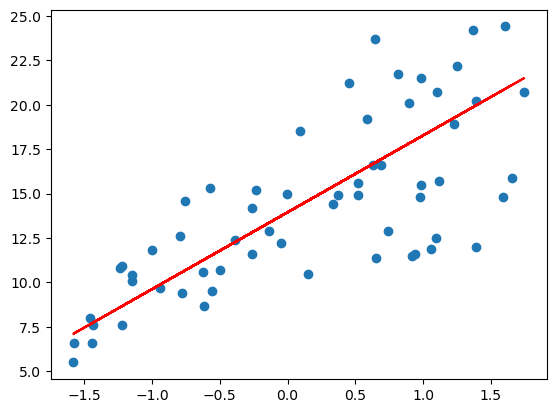

In [34]:
#y_pred = m*X_test + c
#y_pred = 0.6411*X_test + 0.51116

plt.scatter(X_test, y_test)

plt.plot(X_test, 13.9485714 + 4.3258742 * X_test, 'r')   #slope*X + constant
plt.show()

In [35]:
# Multiple Linear Regression model (with more than 1 independent variables)

feature_cols = ['TV', 'Radio', 'Newspaper']
X_all = advertising[feature_cols]    #advertising[['TV','Radio','Newspaper']]
y = advertising.Sales                #it can be written as advertising['Sales']

# Train_test_split the new data
X_all_train, X_all_test, y_train, y_test = train_test_split(X_all, y, train_size = 0.7, test_size = 0.3, random_state = 5)

# instantiate and fit
lm2 = LinearRegression()
lm2.fit(X_all_train, y_train)

# Prediction of target variable
y_train_pred = lm2.predict(X_all_train)
y_test_pred = lm2.predict(X_all_test)

print(r2_score(y_train, y_train_pred))
print(r2_score(y_test, y_test_pred))

0.8997682984995
0.8868821951328664


In [ ]:
#Assignment

#1. To calculate the Evaluation Metrics at one place for both the models above(Adj R2, RMSE)

#sklearn.metrics.mean_squared_error (use this method to calculate RMSE)

In [42]:
from sklearn.metrics import r2_score, mean_squared_error

def cal_adjusted_r2(y_predicted, y_expected, no_predictor_var):
    n = len(y_expected)
    k = no_predictor_var
    r_2 = r2_score(y_expected, y_predicted)
    print('r square', r_2)
    tolerance = 1 - r_2
    adj_r_2 = 1 - tolerance*(n-1)/(n-k-1)
    return adj_r_2

print('adj_r sqr',cal_adjusted_r2(y_test_pred,y_test,len(feature_cols)))

def cal_root_mean_sqr_err(y_predicted, y_expected):
    msr = mean_squared_error(y_expected,y_predicted)
    print('mean sqr error', msr)
    return msr**(.5)

print('root mean sqr error', cal_root_mean_sqr_err(y_test_pred,y_test))

    

r square 0.5111616978794153
adj_r sqr 0.4849739316943841
mean sqr error 10.822786314941839
root mean sqr error 3.2898003457568423
